# Data analysis with our new pipeline

So now we have essentially wrapped up our pipeline into a module that we can play with. We have purposely exposed the main parameters that we care about, so we can try and do some comparisons. We now no longer have to worry about the details of the memristor network or the regression model, and just focus on doing the data analysis. Notice that there is no mention of digits dataset in the `MemristorModel` class. Therefore, as long as the input data is of the same format, we can also experiment with different datasets, but for now, we'll stick with the digits.

In [1]:
from memristive_networks import MemristorModel, get_digits_data, score

from seeds import set_all_seeds

set_all_seeds(0)

First we'll just test everything to make sure it works as expected. If we want to alter our model at all, this will become pretty tedious. Maybe there is a way to automate this process...

In [2]:
X_train, y_train, X_val, y_val, X_test, y_test = get_digits_data()

In [3]:
mem_model = MemristorModel(
    N = 10,
    v_min = 0.01,
    v_max = 0.11,
    n_outputs = 3
)

Connected network found


In [4]:
import matplotlib.pyplot as plt

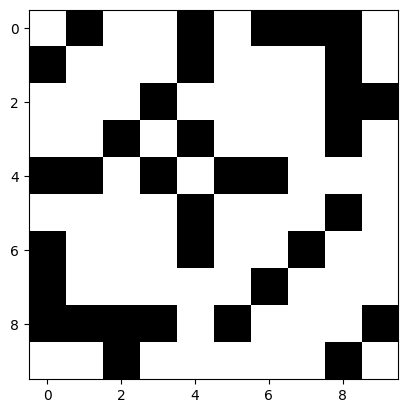

In [5]:
plt.imshow(mem_model.W, 'Greys')
plt.show()

In [6]:
mem_model.fit(X_train, y_train)

  0%|          | 0/1010 [00:00<?, ?it/s]

100%|██████████| 1010/1010 [01:16<00:00, 13.14it/s]


In [7]:
y_pred = mem_model.predict(X_val)

100%|██████████| 337/337 [00:26<00:00, 12.93it/s]


In [9]:
score(y_val, y_pred)

0.973293768545994

In [8]:
N_seeds = 10

from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

accuracy_scores = []
baseline_scores = []

model_args = {
    'N' : 20,
    'v_min' : 0.01,
    'v_max' : 0.11,
    'n_outputs' : 6,
}

for i in range(N_seeds):
    print(f"seed: {i}")
    X_train, y_train, X_val, y_val, X_test, y_test = get_digits_data()
    # Baseline model
    baseline = LogisticRegression(solver='lbfgs', max_iter=4000)
    baseline_scaler = MinMaxScaler()

    baseline_scaler.fit(X_train)

    baseline.fit(baseline_scaler.transform(X_train), y_train)
    y_pred_baseline = baseline.predict(baseline_scaler.transform(X_val))
    baseline_scores.append(score(y_val, y_pred_baseline))
    print(score(y_val, y_pred_baseline))

    # Memristor model
    mem_model = MemristorModel(**model_args)
    mem_model.fit(X_train, y_train)
    y_pred = mem_model.predict(X_val)
    accuracy_scores.append(score(y_val, y_pred))
    print(score(y_val, y_pred))
    

seed: 0
Connected network found


100%|██████████| 337/337 [00:12<00:00, 25.95it/s]


seed: 1
Connected network found


100%|██████████| 337/337 [00:12<00:00, 26.69it/s]


seed: 2
Connected network found


100%|██████████| 337/337 [00:12<00:00, 26.51it/s]


seed: 3
Connected network found


100%|██████████| 337/337 [00:12<00:00, 26.45it/s]


seed: 4
Connected network found


100%|██████████| 337/337 [00:12<00:00, 26.27it/s]


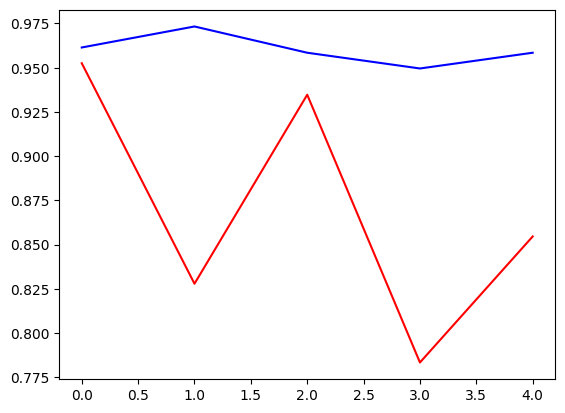

In [9]:
import matplotlib.pyplot as plt

plt.plot(accuracy_scores, 'r')
plt.plot(baseline_scores, 'b')

In [10]:
print(accuracy_scores)
print(baseline_scores)

[0.9525222551928784, 0.827893175074184, 0.9347181008902077, 0.7833827893175074, 0.8545994065281899]
[0.9614243323442137, 0.973293768545994, 0.9584569732937686, 0.9495548961424333, 0.9584569732937686]
